In [1]:
DATA_DIR = "/run/media/anton/hdd/data/audio-diffuser"

In [2]:
from diffusers import Mel
import os
import numpy as np
import audio2numpy

In [3]:
mel = Mel(x_res=256, y_res=256, sample_rate=44100)

audio_loc = os.path.join(DATA_DIR, "mix.mp3")

mel.load_audio(audio_loc)

In [4]:
mel.get_number_of_slices()

888

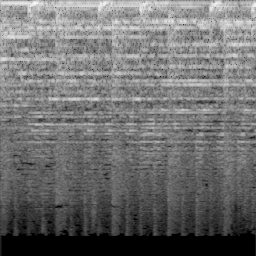

In [5]:
image = mel.audio_slice_to_image(800)
image

In [6]:
for s in range(mel.get_number_of_slices()):
    image = mel.audio_slice_to_image(s)
    path = os.path.join(DATA_DIR, "images", f"{s}.jpg")
    image.save(path)

In [7]:
image = mel.audio_slice_to_image(680)
image

raw = mel.image_to_audio(image)
raw.shape

(130560,)

In [8]:
import numpy as np
from pydub import AudioSegment

# Example NumPy array representing an audio signal
# Replace this with your actual audio signal array
sample_rate = 44100  # Sample rate in Hz
duration = 5  # Duration in seconds

# Ensure audio signal is in the correct format (16-bit PCM)
audio_signal = np.int16(raw * 8 * 32767)

# Convert NumPy array to an AudioSegment
audio_segment = AudioSegment(
    audio_signal.tobytes(), 
    frame_rate=sample_rate,
    sample_width=audio_signal.dtype.itemsize, 
    channels=1
)

# Export the AudioSegment to an MP3 file
audio_segment.export("output.mp3", format="mp3")

<_io.BufferedRandom name='output.mp3'>